## Метод локтя

Вначале сгенерируем три облака точек с помощью `sklearn`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=16)

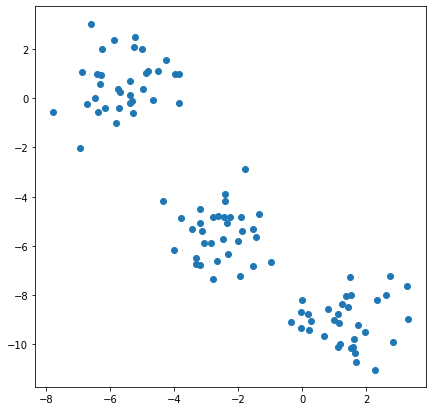

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

Посчитаем центроиду для одного кластера

In [ ]:
centroid = np.mean(X, axis=0)
centroid

array([-2.29768256, -4.59342859])

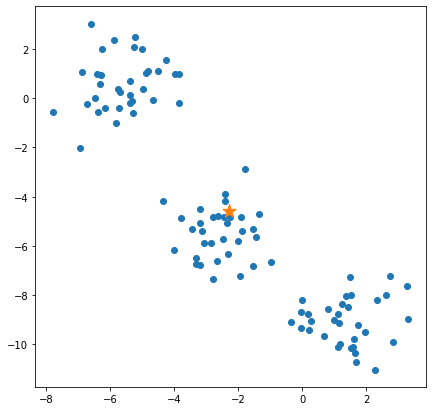

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroid[0], centroid[1], marker='*', s=200);

Посчитаем внутрикластерное расстояние


$$\sum\rho^{2}(x_{i}, c)$$



In [ ]:
dists = 0
for x in X:
    dists += np.linalg.norm(x - centroid) ** 2

dists

2588.7486419573993

inertia_ : float
    Sum of squared distances of samples to their closest cluster center,
weighted by the sample weights if provided.

In [ ]:
from sklearn.cluster import KMeans as sk_KMeans

km = sk_KMeans(n_clusters=1).fit(X)
km.inertia_

2588.7486419573984

Сделаем два кластера

In [ ]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

    return centroids

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        centroids = kmeanspp(X, k=k, seed=seed)

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X, k=2)

stopping at iter 1


In [ ]:
colors = ['green', 'orange', 'red', 'navy', 'pink', 'yellow', 'black']

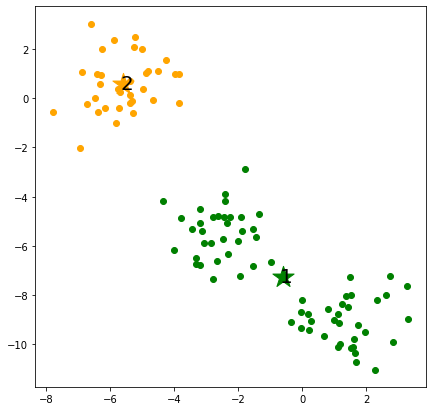

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);


$$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$



 $$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$

In [ ]:
dists = 0
for i in clusters:
    for x in clusters[i]:
        dists += np.linalg.norm(x - centroids[i]) ** 2

dists

649.4333696428022

In [ ]:
km = sk_KMeans(n_clusters=2).fit(X)
km.inertia_

648.9673346244897

Сделаем три кластера

In [ ]:
centroids, clusters = KMeans(X, k=3)

stopping at iter 2


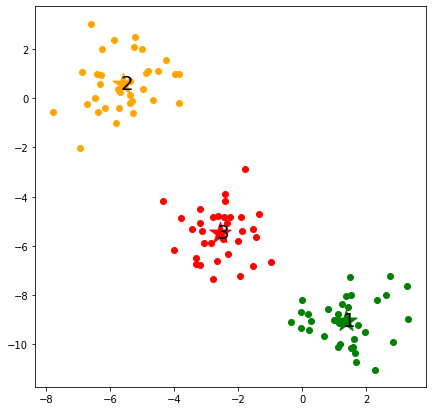

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [ ]:
dists = 0
for i in clusters:
    for x in clusters[i]:
        dists += np.linalg.norm(x - centroids[i]) ** 2

dists

182.88763537399484

In [ ]:
km = sk_KMeans(n_clusters=3).fit(X)
km.inertia_

182.88763537399484

### Цикл для обучения на разном кол-ве кластеров

In [ ]:
inertias = []
for i in range(1, 7):
    centroids, clusters = KMeans(X, k=i)
    dists = 0
    for i in clusters:
        for x in clusters[i]:
            dists += np.linalg.norm(x - centroids[i]) ** 2

    inertias.append(dists)

stopping at iter 1
stopping at iter 1
stopping at iter 2
stopping at iter 8
stopping at iter 2
stopping at iter 2


In [ ]:
inertias

[2588.7486419573993,
 649.4333696428022,
 182.88763537399484,
 154.3118712536231,
 140.48669823056807,
 117.49339708989534]

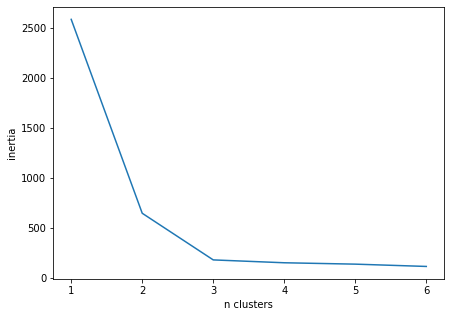

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(inertias)
plt.xticks(np.arange(0, 6), np.arange(1, 7))
plt.xlabel('n clusters')
plt.ylabel('inertia');

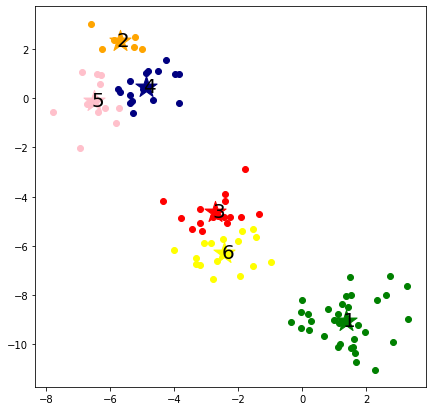

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

#### Подбираем оптимальное количество

Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

Считаем изменения
$${inertia_{k+1}-inertia_{k}}$$

In [ ]:
diff = np.diff(inertias)

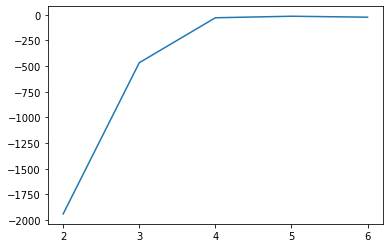

In [ ]:
plt.plot(diff)
plt.xticks(np.arange(0, 5), np.arange(2, 7));

Теперь можно найти оптимальное число кластеров по этой формуле:
$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [ ]:
diff[1:]

array([-466.54573427,  -28.57576412,  -13.82517302,  -22.99330114])

In [ ]:
diff[:-1]

array([-1939.31527231,  -466.54573427,   -28.57576412,   -13.82517302])

In [ ]:
diff_r = diff[1:] / diff[:-1]

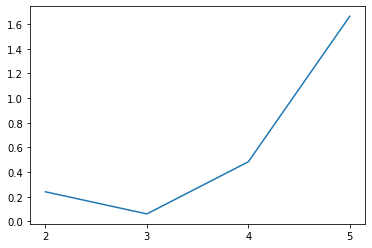

In [ ]:
plt.plot(diff_r)
plt.xticks(np.arange(0, 4), np.arange(2, 6));

In [ ]:
centroids, clusters = KMeans(X, k=3)

stopping at iter 2


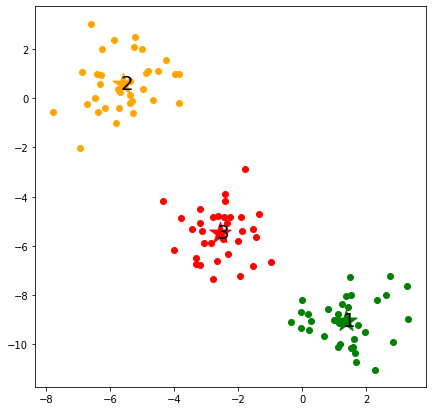

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

### Посложнее данные

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=300, random_state=10, n_informative=2, n_redundant=0)

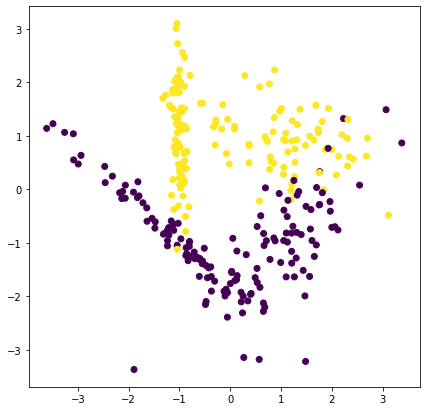

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
inertias = []
for i in range(1, 7):
    centroids, clusters = KMeans(X, k=i)
    dists = 0
    for i in clusters:
        for x in clusters[i]:
            dists += np.linalg.norm(x - centroids[i]) ** 2

    inertias.append(dists)

stopping at iter 1


In [ ]:
inertias

[6281.391177646002,
 5925.287079888724,
 5542.179623547259,
 5386.471555837043,
 5285.379165902779,
 5179.179598195613]

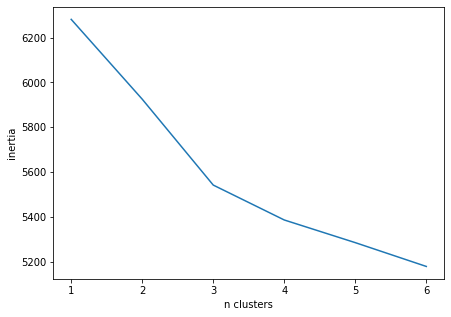

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(inertias)
plt.xlabel('n clusters')
plt.ylabel('inertia')
plt.xticks(np.arange(0, 6), np.arange(1, 7));

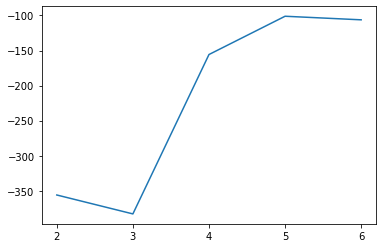

In [ ]:
diff = np.diff(inertias)

plt.plot(diff)
plt.xticks(np.arange(0, 5), np.arange(2, 7));

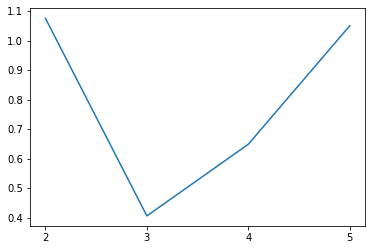

In [ ]:
diff_r = diff[1:] / diff[:-1]

plt.plot(diff_r)
plt.xticks(np.arange(0, 4), np.arange(2, 6));

In [ ]:
centroids, clusters = KMeans(X, k=3, num_iter=20, seed=10)

stopping at iter 15


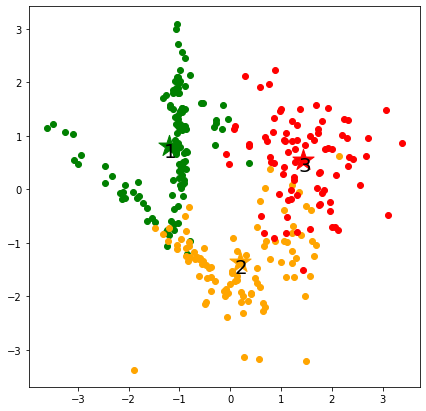

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

### yellowbrick

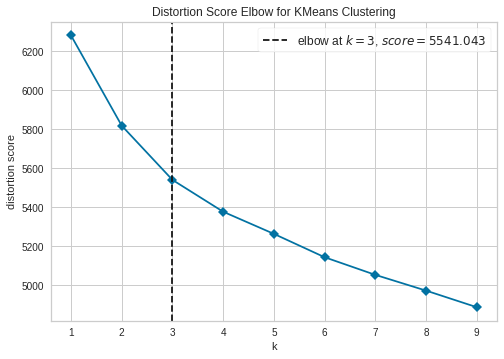

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = sk_KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)

visualizer.fit(X)
visualizer.show();

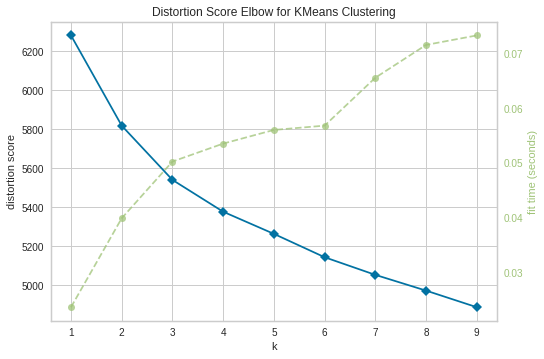

In [ ]:
visualizer = KElbowVisualizer(model, k=(1,10), timings=True, locate_elbow=False)

visualizer.fit(X)
visualizer.show();

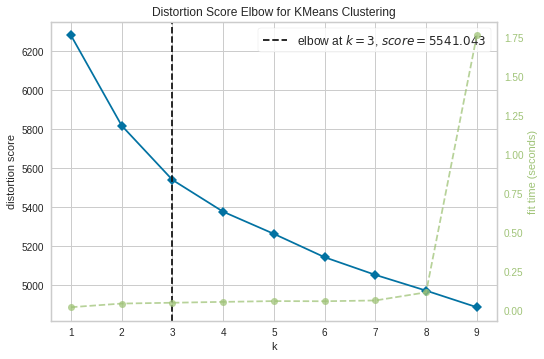

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(sk_KMeans(random_state=0), X, k=(1,10), timing=False);